<a href="https://colab.research.google.com/github/QaziSaim/DeepLearning--DeepNeuralNetwork-/blob/main/RegularizerPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Input
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical # it is use for one hot encoding
import keras
from keras.models import Model

In [11]:
datasets = load_iris()
X = datasets.data
y = datasets.target # target
y = to_categorical(y,num_classes=3)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=43)
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [12]:
reg1 = keras.regularizers.L1(l1 = 0.001)
reg2 = keras.regularizers.L2(l2 = 0.001)

In [62]:
# Define Functional API
inputs = Input(shape = (X_train.shape[1],))

layer1 = Dense(10,activation = 'relu',kernel_regularizer=reg1)(inputs)
layer2 = Dense(5,activation = 'relu',kernel_regularizer=reg2)(layer1)

layer3 = Dense(10,activation ='relu',kernel_regularizer=reg2)(inputs)
layer4 = Dense(5, activation='relu',kernel_regularizer=reg1)(layer3)

output1 = Dense(y_train.shape[1],activation='softmax')(layer2)
output2 = Dense(y_train.shape[1],activation='softmax')(layer4)
outputs = keras.layers.Concatenate(axis=1)([output1,output2])
model = Model(inputs=inputs,outputs = [output1,output2])

In [63]:
model.compile(loss=['categorical_crossentropy','categorical_crossentropy'],optimizer='adam',metrics=['accuracy'])

In [64]:
model.fit(X_train,[y_train,y_train],epochs=50)

Epoch 1/50


ValueError: For a model with multiple outputs, when providing the `metrics` argument as a list, it should have as many entries as the model has outputs. Received:
metrics=['accuracy']
of length 1 whereas the model has 2 outputs.

In [51]:
loss,accuracy = model.evaluate(X_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6796 - loss: 0.5647 


In [52]:
loss

0.5972657799720764

In [53]:
accuracy

0.644444465637207

In [49]:
y_train.shape[1]

3

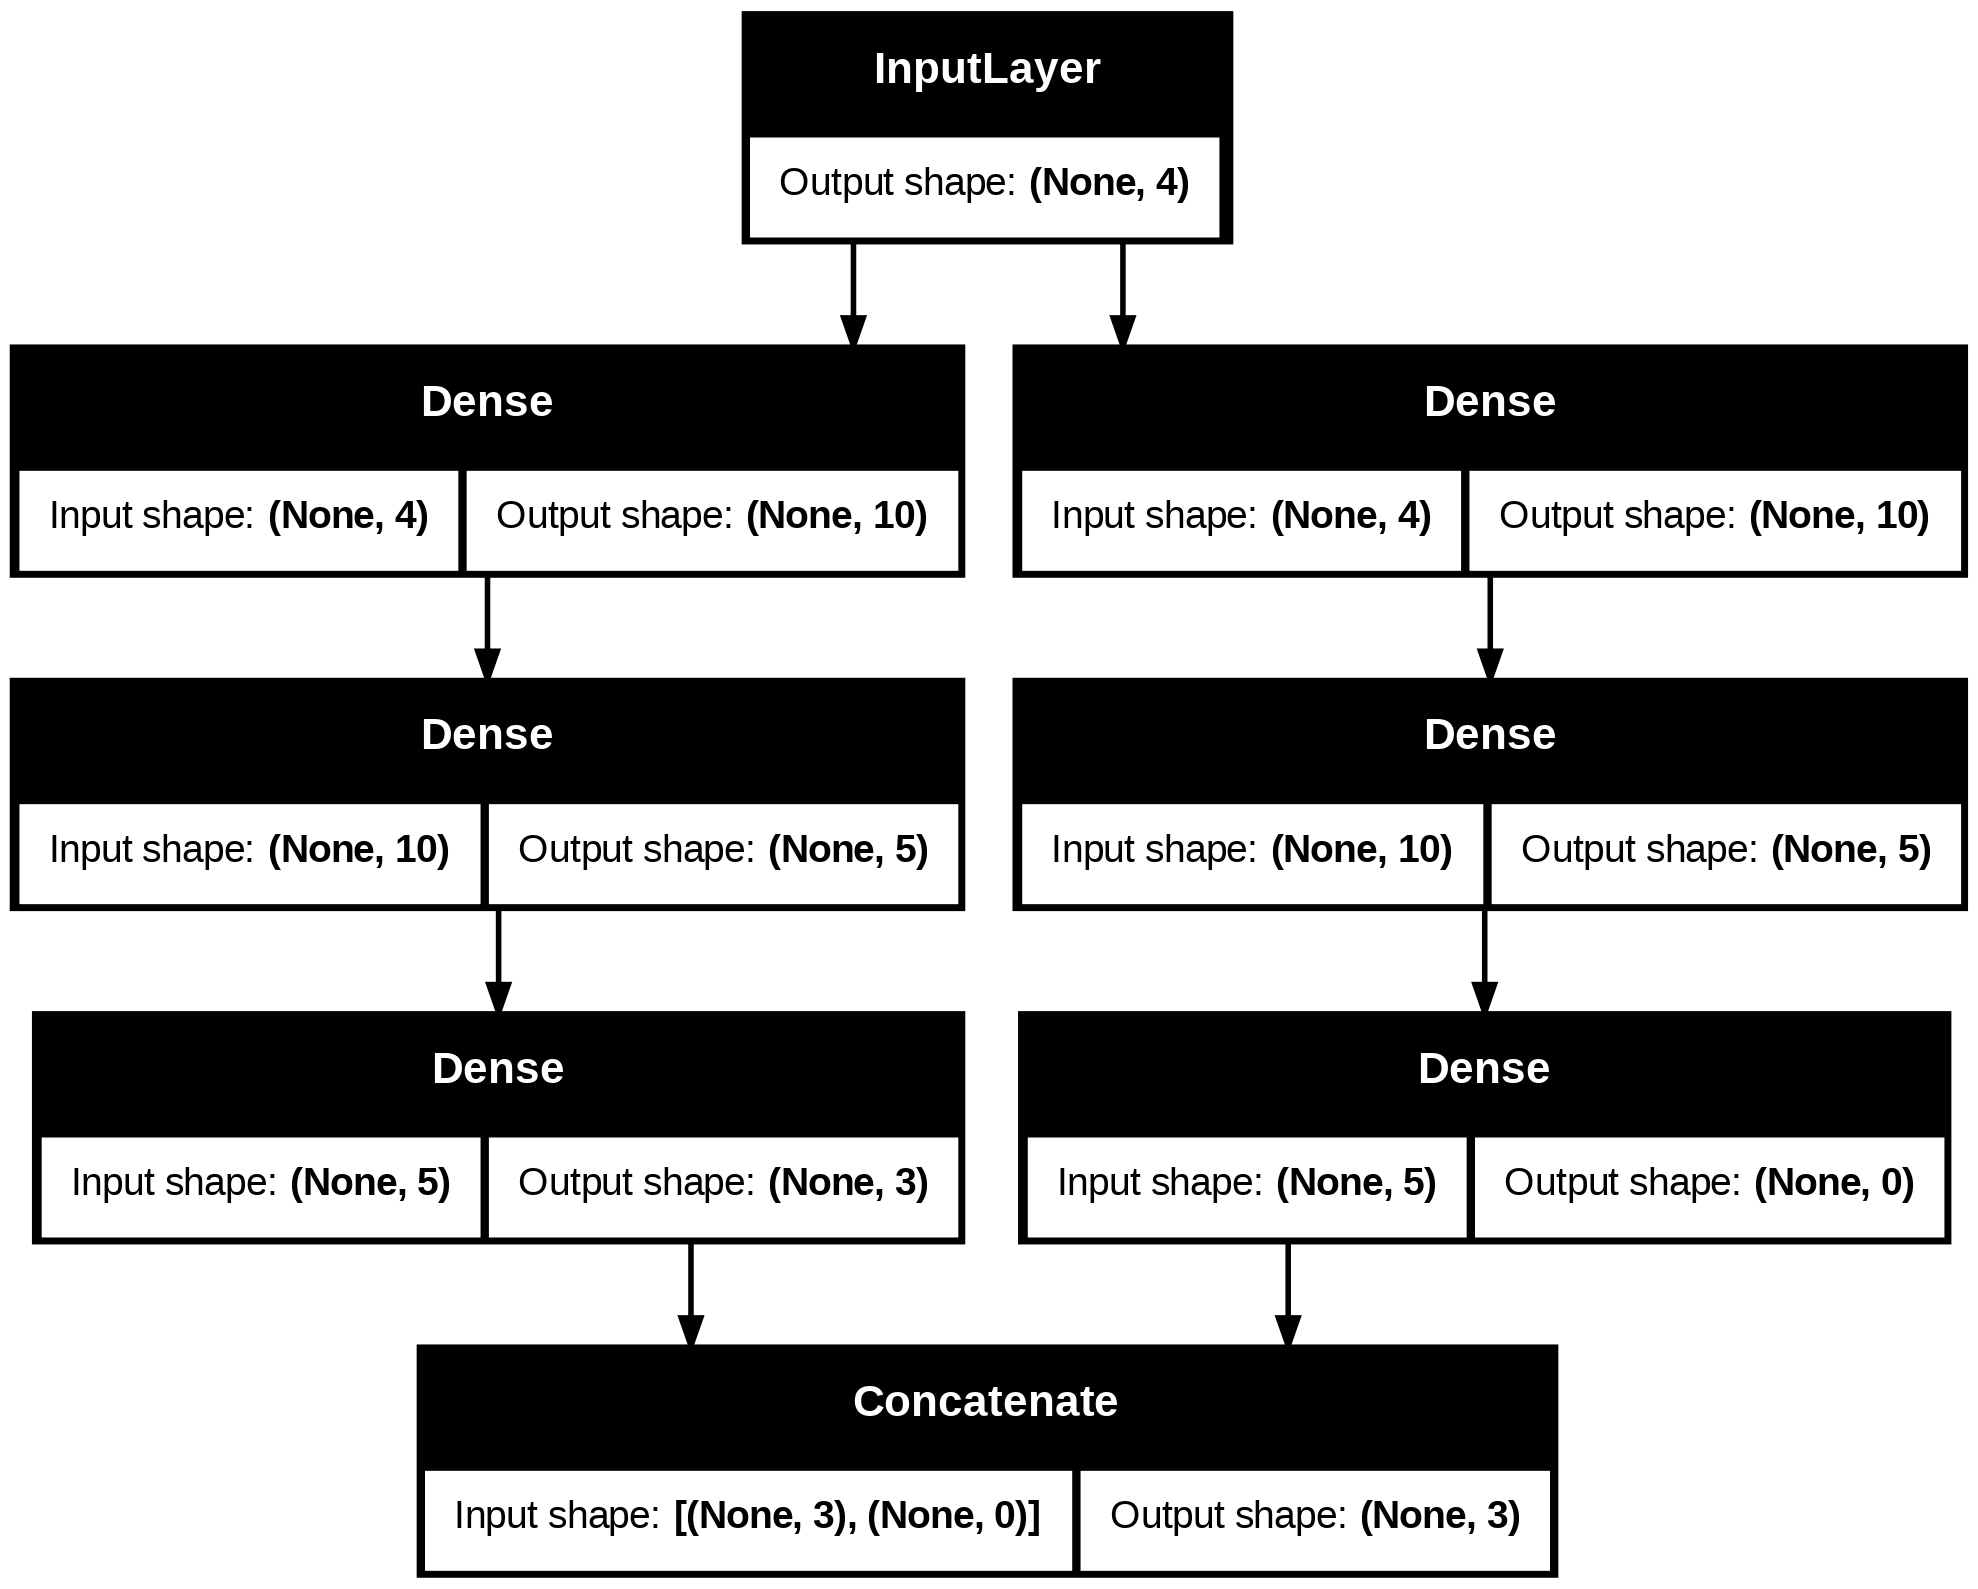

In [50]:
keras.utils.plot_model(model,show_shapes=True)